# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [3]:
# Directories
data_dir = '../data'
raw_data_dir = f'{data_dir}/raw'

# Dataset name and path
dataset_name = 'brfss_heart_2022.csv'
dataset_path = f'{raw_data_dir}/{dataset_name}'

# Load dataframe
df = pd.read_csv(dataset_path)

# Initial Review

## Dimensions
rows, cols

In [4]:
df.shape

(445132, 40)

## Head
First few records

In [5]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Features
There are 40 features including one target variable (HadHeartAttack).

In [6]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Data Types

In [7]:
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## Missing Values

In [93]:
print(df.isna().any(axis=1).sum())

199110


In [8]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

## Unique Values

In [9]:
for col in df:
    print(f'{col}: {(df[col].nunique())}')

State: 54
Sex: 2
GeneralHealth: 5
PhysicalHealthDays: 31
MentalHealthDays: 31
LastCheckupTime: 4
PhysicalActivities: 2
SleepHours: 24
RemovedTeeth: 4
HadHeartAttack: 2
HadAngina: 2
HadStroke: 2
HadAsthma: 2
HadSkinCancer: 2
HadCOPD: 2
HadDepressiveDisorder: 2
HadKidneyDisease: 2
HadArthritis: 2
HadDiabetes: 4
DeafOrHardOfHearing: 2
BlindOrVisionDifficulty: 2
DifficultyConcentrating: 2
DifficultyWalking: 2
DifficultyDressingBathing: 2
DifficultyErrands: 2
SmokerStatus: 4
ECigaretteUsage: 4
ChestScan: 2
RaceEthnicityCategory: 5
AgeCategory: 13
HeightInMeters: 109
WeightInKilograms: 599
BMI: 3985
AlcoholDrinkers: 2
HIVTesting: 2
FluVaxLast12: 2
PneumoVaxEver: 2
TetanusLast10Tdap: 4
HighRiskLastYear: 2
CovidPos: 3


In [10]:
for col in df:
    print(f'{col}: {df[col].unique()}\n')

State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Sex: ['Female' 'Male']

GeneralHealth: ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]

PhysicalHealthDays: [ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 19. 18. 22.]

MentalHealthDays: [ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1. nan  2. 30.  4.  6.  7. 25.  8.
 22. 29. 27. 2

## Duplicates

In [11]:
df.duplicated(keep='first').sum()

np.int64(157)

In [12]:
df[df.duplicated()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7310,Alaska,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11503,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.7,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
28206,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29339,California,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32711,California,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411300,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427638,Wisconsin,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431351,Wisconsin,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431653,Wisconsin,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Statistical Summary

In [13]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


# Data Preprocessing

## Data Cleaning

### Drop Columns
Drop unnecessary columns:
- `State`: only applicable to the United States
- `HeightInMeters`: BMI column already exists
- `WeightInKilograms`: BMI column already exists

In [14]:
# Sanity check
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [15]:
df_dropcol = df.drop(columns=[
    'State', 'HeightInMeters', 'WeightInKilograms'
])
df_dropcol.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

### Rename Columns

In [16]:
df_rename = df_dropcol.rename(columns={
    'Sex': 'gender', 'GeneralHealth': 'general_health', 'PhysicalHealthDays': 'physical_health_days', 'MentalHealthDays': 'mental_health_days',
    'LastCheckupTime': 'last_checkup_time', 'PhysicalActivities': 'physical_activities', 'SleepHours': 'sleep_hours', 'RemovedTeeth': 'removed_teeth',
    'HadHeartAttack': 'had_heart_attack', 'HadAngina': 'had_angina', 'HadStroke': 'had_stroke', 'HadAsthma': 'had_asthma',
    'HadSkinCancer': 'had_skin_cancer', 'HadCOPD': 'had_copd', 'HadDepressiveDisorder': 'had_depressive_disorder', 'HadKidneyDisease': 'had_kidney_disease',
    'HadArthritis': 'had_arthritis', 'HadDiabetes': 'had_diabetes', 'DeafOrHardOfHearing': 'difficulty_hearing',
    'BlindOrVisionDifficulty': 'difficulty_vision', 'DifficultyConcentrating': 'difficulty_concentrating',
    'DifficultyWalking': 'difficulty_walking', 'DifficultyDressingBathing': 'difficulty_dressing_bathing', 'DifficultyErrands': 'difficulty_errands',
    'SmokerStatus': 'smoker_status', 'ECigaretteUsage': 'ecigarette_usage', 'ChestScan': 'chest_scan', 'RaceEthnicityCategory': 'race_ethnicity_category',
    'AgeCategory': 'age_category', 'BMI': 'bmi', 'AlcoholDrinkers': 'alcohol_drinker', 'HIVTesting': 'hiv_testing', 'FluVaxLast12': 'fluvax_last12',
    'PneumoVaxEver': 'pneumovax_ever', 'TetanusLast10Tdap': 'tetanus_last10_tdap', 'HighRiskLastYear': 'hiv_highrisk_lastyear', 'CovidPos': 'covid_positive'
})
df_rename.columns

Index(['gender', 'general_health', 'physical_health_days',
       'mental_health_days', 'last_checkup_time', 'physical_activities',
       'sleep_hours', 'removed_teeth', 'had_heart_attack', 'had_angina',
       'had_stroke', 'had_asthma', 'had_skin_cancer', 'had_copd',
       'had_depressive_disorder', 'had_kidney_disease', 'had_arthritis',
       'had_diabetes', 'difficulty_hearing', 'difficulty_vision',
       'difficulty_concentrating', 'difficulty_walking',
       'difficulty_dressing_bathing', 'difficulty_errands', 'smoker_status',
       'ecigarette_usage', 'chest_scan', 'race_ethnicity_category',
       'age_category', 'bmi', 'alcohol_drinker', 'hiv_testing',
       'fluvax_last12', 'pneumovax_ever', 'tetanus_last10_tdap',
       'hiv_highrisk_lastyear', 'covid_positive'],
      dtype='object')

### Reorder Columns

In [17]:
# Sort by alphabetical order
df_reorder = df_rename[sorted(df_rename.columns)]

# Move target variable to front
target_col = 'had_heart_attack'
cols = [target_col] + [col for col in df_reorder.columns if col != target_col]
df_reorder = df_reorder[cols]
df_reorder

,had_heart_attack,age_category,alcohol_drinker,bmi,chest_scan,covid_positive,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,difficulty_hearing,...,last_checkup_time,mental_health_days,physical_activities,physical_health_days,pneumovax_ever,race_ethnicity_category,removed_teeth,sleep_hours,smoker_status,tetanus_last10_tdap
0,No,Age 80 or older,No,NaN,No,No,No,No,No,No,...,Within past year (anytime less than 12 months ...,0.0,No,0.0,No,"White only, Non-Hispanic",NaN,8.0,Never smoked,"Yes, received tetanus shot but not sure what type"
1,No,Age 80 or older,No,26.57,No,No,No,No,No,No,...,NaN,0.0,No,0.0,No,"White only, Non-Hispanic",NaN,6.0,Never smoked,"No, did not receive any tetanus shot in the pa..."
2,No,Age 55 to 59,No,25.61,No,Yes,No,No,No,No,...,Within past year (anytime less than 12 months ...,3.0,Yes,2.0,No,"White only, Non-Hispanic",NaN,5.0,Never smoked,NaN
3,No,NaN,No,23.30,Yes,No,No,No,No,No,...,Within past year (anytime less than 12 months ...,0.0,Yes,0.0,Yes,"White only, Non-Hispanic",NaN,7.0,Current smoker - now smokes some days,"No, did not receive any tetanus shot in the pa..."
4,No,Age 40 to 44,Yes,21.77,Yes,No,No,No,No,No,...,Within past year (anytime less than 12 months ...,0.0,Yes,2.0,Yes,"White only, Non-Hispanic",NaN,9.0,Never smoked,"No, did not receive any tetanus shot in the pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,No,Age 18 to 24,NaN,25.63,Yes,Yes,No,No,No,No,...,Within past 2 years (1 year but less than 2 ye...,3.0,Yes,0.0,No,"Black only, Non-Hispanic",None of them,6.0,Never smoked,"No, did not receive any tetanus shot in the pa..."
445128,No,Age 50 to 54,No,28.66,No,No,No,No,No,No,...,Within past year (anytime less than 12 months ...,2.0,Yes,2.0,No,"Black only, Non-Hispanic",None of them,7.0,Never smoked,"Yes, received tetanus shot but not sure what type"
445129,No,Age 65 to 69,NaN,17.23,NaN,No,NaN,No,No,No,...,5 or more years ago,30.0,No,30.0,No,NaN,1 to 5,5.0,Current smoker - now smokes every day,"No, did not receive any tetanus shot in the pa..."
445130,Yes,Age 70 to 74,No,32.55,Yes,Yes,No,No,No,No,...,Within past year (anytime less than 12 months ...,0.0,No,0.0,Yes,"Black only, Non-Hispanic",None of them,5.0,Never smoked,"No, did not receive any tetanus shot in the pa..."


### Handle Duplicates

Prior to removing unnecessary columns, the initial number of duplicates was 157. This means that the additional duplicates in consideration at this point are not erroneous. Furthermore, the original dataset was narrowed down from 330 columns, meaning it is likely that the initial 157 duplicates were not erroneous duplicates either. Therefore, we shall keep them for now.

In [18]:
df_reorder.duplicated(keep='first').sum()

np.int64(1909)

### Handle Missing Values

Just drop as there are too many rows for imputation.

In [19]:
df_dropnan = df_reorder.dropna()
df_dropnan.isna().sum()

had_heart_attack               0
age_category                   0
alcohol_drinker                0
bmi                            0
chest_scan                     0
covid_positive                 0
difficulty_concentrating       0
difficulty_dressing_bathing    0
difficulty_errands             0
difficulty_hearing             0
difficulty_vision              0
difficulty_walking             0
ecigarette_usage               0
fluvax_last12                  0
gender                         0
general_health                 0
had_angina                     0
had_arthritis                  0
had_asthma                     0
had_copd                       0
had_depressive_disorder        0
had_diabetes                   0
had_kidney_disease             0
had_skin_cancer                0
had_stroke                     0
hiv_highrisk_lastyear          0
hiv_testing                    0
last_checkup_time              0
mental_health_days             0
physical_activities            0
physical_h

In [20]:
df_dropnan.shape

(246022, 37)

# Exploratory Data Analysis

In [21]:
# Create DF copy for EDA
df_eda = df_dropnan.copy()

# Specify categorical and numerical features
numerical_features = ['bmi', 'mental_health_days', 'physical_health_days', 'sleep_hours']
categorical_features = [category for category in df_eda.columns.tolist() if category not in numerical_features and category != 'had_heart_attack']

## Class Distribution

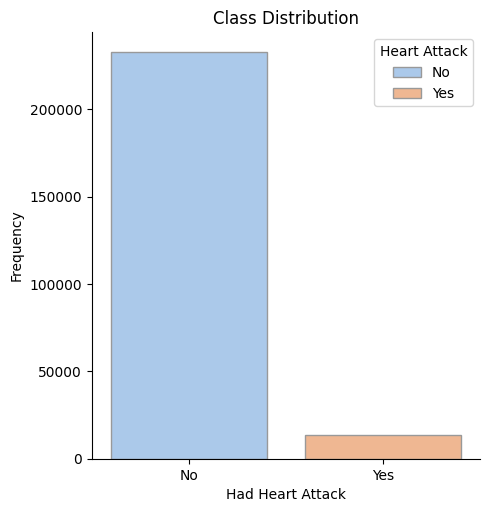

In [22]:
sns.catplot(data=df_eda, x='had_heart_attack', kind='count', hue='had_heart_attack', palette='pastel', edgecolor='.6')
plt.title('Class Distribution')
plt.xlabel('Had Heart Attack')
plt.ylabel('Frequency')
plt.legend(title='Heart Attack', loc='upper right', labels=['No', 'Yes'])
plt.show()

## Numerical Features Analysis

Distribution

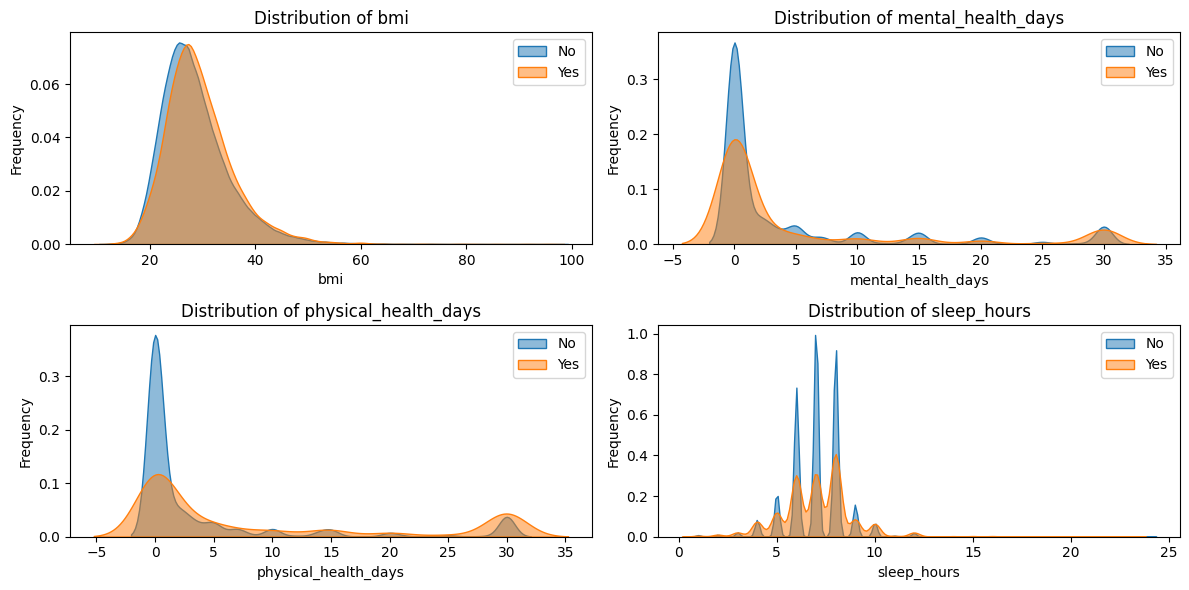

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

for i in range(len(numerical_features)):
    feature = numerical_features[i]
    sns.kdeplot(df_eda[df_eda['had_heart_attack'] == 'No'][feature], alpha=0.5, fill=True, label=feature, ax=axes[i])
    sns.kdeplot(df_eda[df_eda['had_heart_attack'] == 'Yes'][feature], alpha=0.5, fill=True, label=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Outliers

C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\3802542995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='had_heart_attack', y=feature, ax=axes[i], palette='pastel')
C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\3802542995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='had_heart_attack', y=feature, ax=axes[i], palette='pastel')
C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\3802542995.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='had_heart_attack', y=feature, ax=axes[i]

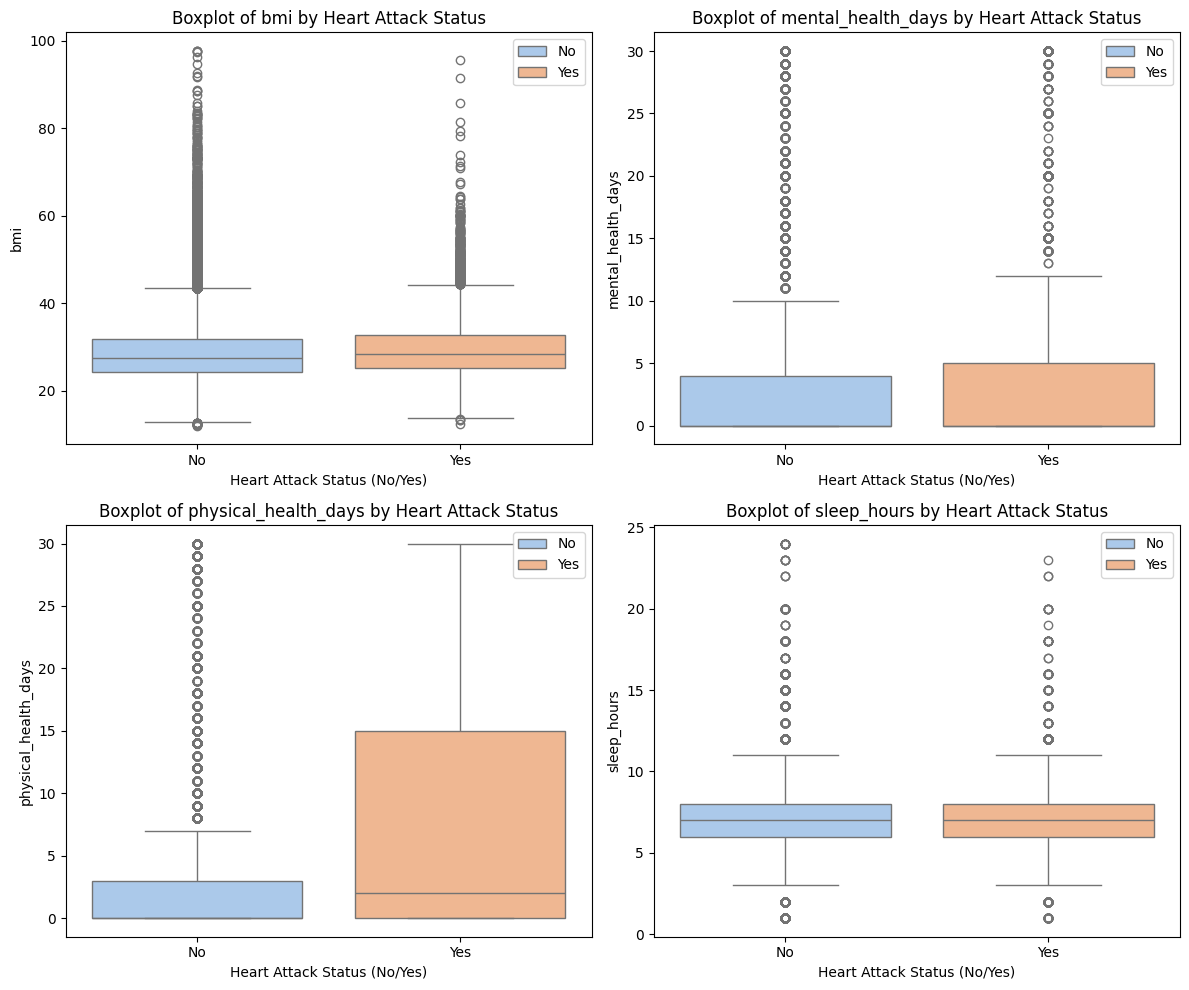

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i in range(len(numerical_features)):
    feature = numerical_features[i]
    sns.boxplot(data=df_eda, x='had_heart_attack', y=feature, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Boxplot of {feature} by Heart Attack Status')
    axes[i].set_xlabel('Heart Attack Status (No/Yes)')
    axes[i].set_ylabel(feature)
    axes[i].legend(loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Categorical Features Analysis

Distribution

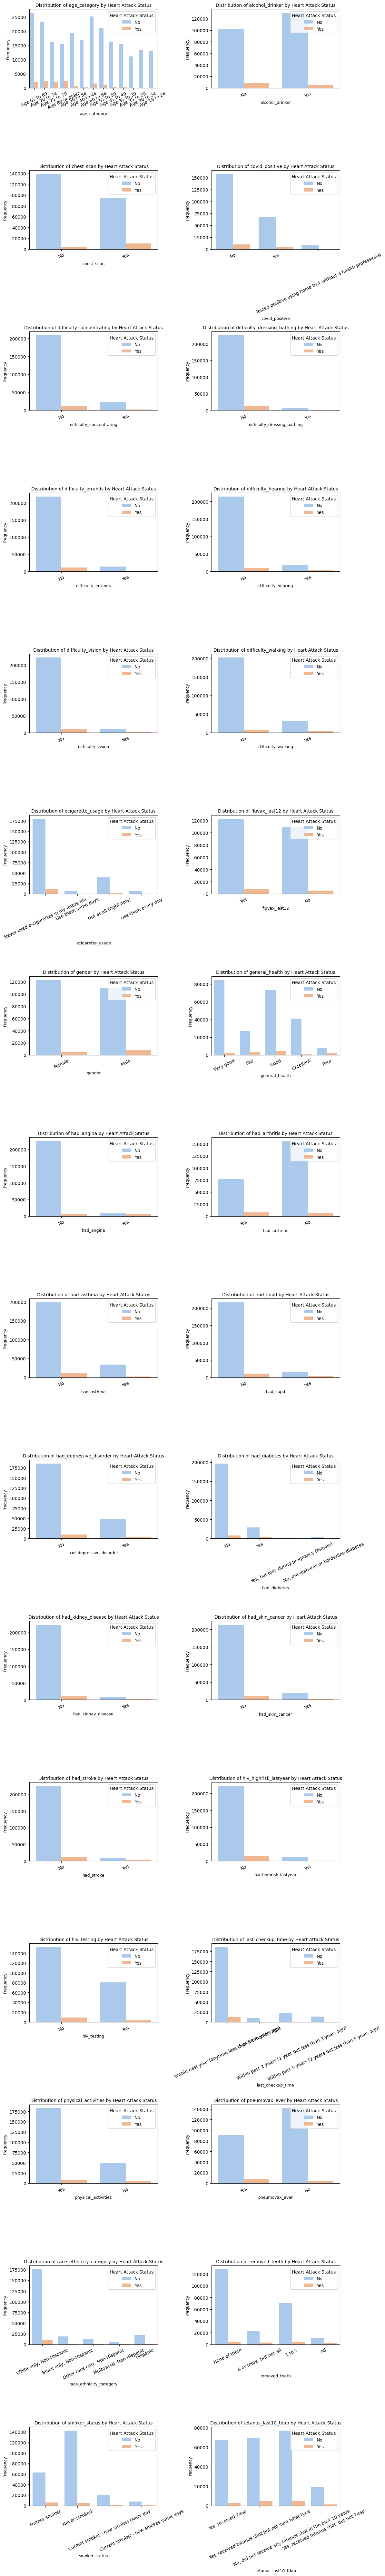

In [25]:
import math

n_cols = 2
n_rows = math.ceil(len(categorical_features) / n_cols)
fig_height = n_rows * 5

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, fig_height))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_eda, x=feature, hue='had_heart_attack', ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature} by Heart Attack Status', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)
    axes[i].tick_params(axis='x', rotation=25)
    axes[i].legend(title='Heart Attack Status', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\88293031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda[df_eda['had_heart_attack'] == 'Yes'], x=feature, ax=axes[i], palette='pastel')
C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\88293031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda[df_eda['had_heart_attack'] == 'Yes'], x=feature, ax=axes[i], palette='pastel')
C:\Users\wztho\AppData\Local\Temp\ipykernel_10452\88293031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_eda[df_eda['had_he

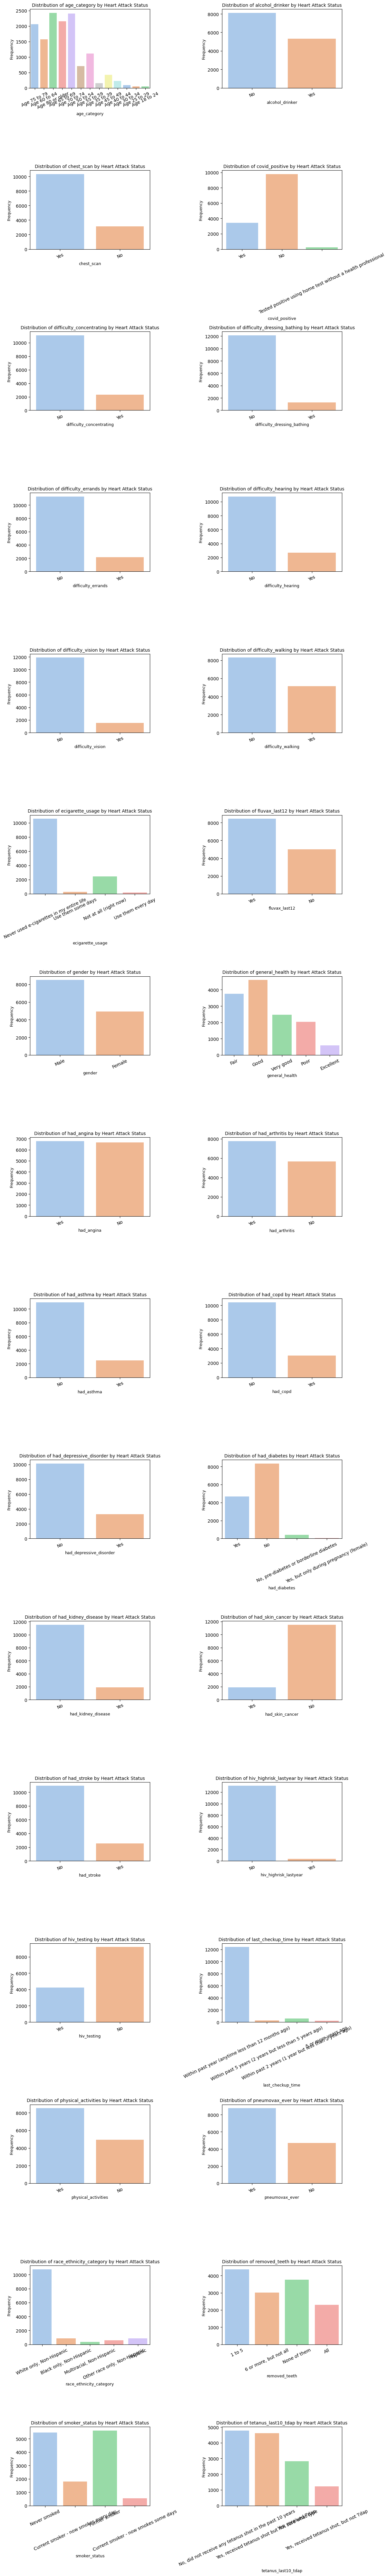

In [96]:
n_cols = 2
n_rows = math.ceil(len(categorical_features) / n_cols)
fig_height = n_rows * 5

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, fig_height))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_eda[df_eda['had_heart_attack'] == 'Yes'], x=feature, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {feature} by Heart Attack Status', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)
    axes[i].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

# Feature Engineering

In [32]:
df_feng = df_eda.copy()
df_feng.columns

Index(['had_heart_attack', 'age_category', 'alcohol_drinker', 'bmi',
       'chest_scan', 'covid_positive', 'difficulty_concentrating',
       'difficulty_dressing_bathing', 'difficulty_errands',
       'difficulty_hearing', 'difficulty_vision', 'difficulty_walking',
       'ecigarette_usage', 'fluvax_last12', 'gender', 'general_health',
       'had_angina', 'had_arthritis', 'had_asthma', 'had_copd',
       'had_depressive_disorder', 'had_diabetes', 'had_kidney_disease',
       'had_skin_cancer', 'had_stroke', 'hiv_highrisk_lastyear', 'hiv_testing',
       'last_checkup_time', 'mental_health_days', 'physical_activities',
       'physical_health_days', 'pneumovax_ever', 'race_ethnicity_category',
       'removed_teeth', 'sleep_hours', 'smoker_status', 'tetanus_last10_tdap'],
      dtype='object')

Categorical features need to be encoded for models that can only work with numerical data.

| Type | Features | Solution |
| - | - | - |
| Nominal | age_category, covid_positive, ecigarette_usage, general_health, had_diabetes, last_checkup_time, race_ethnicity_category, removed_teeth, smoker_status, tetanus_last10_tdap | Target Encoding |
| Ordinal | None | - |
| Binary | **had_heart_attack**, alcohol_drinker, chest_scan, difficulty_concentrating, difficulty_dressing_bathing, difficulty_errands, difficulty_hearing, difficulty_vision, difficulty_walking, fluxvax_last12, gender , had_angina, had_arthritis, had_asthma, had_copd, had_depressive_disorder, had_kidney_disease, had_skin_cancer, had_stroke, hiv_highrisk_lastyear, hiv_testing, physical_activities, pneumovax_ever | Binary |

## Target Encoding

In [34]:
from sklearn.preprocessing import TargetEncoder

nominal_features = ['age_category', 'covid_positive', 'ecigarette_usage', 'general_health', 'had_diabetes', 'last_checkup_time', 'race_ethnicity_category', 'removed_teeth', 'smoker_status', 'tetanus_last10_tdap']
target_encoder = TargetEncoder()
df_target_encode = df_feng.copy()

df_target_encode[nominal_features] = target_encoder.fit_transform(df_target_encode[nominal_features], df_target_encode['had_heart_attack'])
df_target_encode[nominal_features]

,age_category,covid_positive,ecigarette_usage,general_health,had_diabetes,last_checkup_time,race_ethnicity_category,removed_teeth,smoker_status,tetanus_last10_tdap
342,0.075709,0.058272,0.055511,0.028357,0.040535,0.062507,0.057635,0.028827,0.082050,0.040204
343,0.093510,0.058441,0.055752,0.028195,0.138934,0.062551,0.057738,0.028633,0.081592,0.062026
345,0.114254,0.048924,0.055535,0.028646,0.040704,0.062452,0.057837,0.113620,0.081567,0.059106
346,0.135313,0.049145,0.055511,0.122617,0.040535,0.062507,0.057635,0.028827,0.037141,0.058362
347,0.137355,0.058441,0.055752,0.059601,0.040562,0.062551,0.057738,0.058593,0.037006,0.058032
...,...,...,...,...,...,...,...,...,...,...
445117,0.057494,0.058433,0.055535,0.028646,0.040704,0.025271,0.057837,0.028788,0.037285,0.062477
445123,0.004168,0.047966,0.055624,0.122795,0.040986,0.062581,0.046604,0.028423,0.036984,0.058493
445124,0.074250,0.048924,0.055535,0.058792,0.136531,0.062452,0.062470,0.058299,0.037285,0.062477
445128,0.035057,0.058272,0.055511,0.014205,0.040535,0.062507,0.046833,0.028827,0.037141,0.062332


## Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

binary_features = ['had_heart_attack', 'alcohol_drinker', 'chest_scan', 'difficulty_concentrating', 'difficulty_dressing_bathing', 'difficulty_errands', 'difficulty_hearing', 'difficulty_vision', 'difficulty_walking', 'fluvax_last12', 'gender' , 'had_angina', 'had_arthritis', 'had_asthma', 'had_copd', 'had_depressive_disorder', 'had_kidney_disease', 'had_skin_cancer', 'had_stroke', 'hiv_highrisk_lastyear', 'hiv_testing', 'physical_activities', 'pneumovax_ever']
label_encoder = LabelEncoder()
df_label_encode = df_target_encode.copy()

for feature in binary_features:
    df_label_encode[feature] = label_encoder.fit_transform(df_label_encode[feature])
    
df_label_encode[binary_features]

,had_heart_attack,alcohol_drinker,chest_scan,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,difficulty_hearing,difficulty_vision,difficulty_walking,fluvax_last12,...,had_asthma,had_copd,had_depressive_disorder,had_kidney_disease,had_skin_cancer,had_stroke,hiv_highrisk_lastyear,hiv_testing,physical_activities,pneumovax_ever
342,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
343,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
345,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
346,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,1
347,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
445123,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
445124,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,1
445128,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


# Correlation Analysis

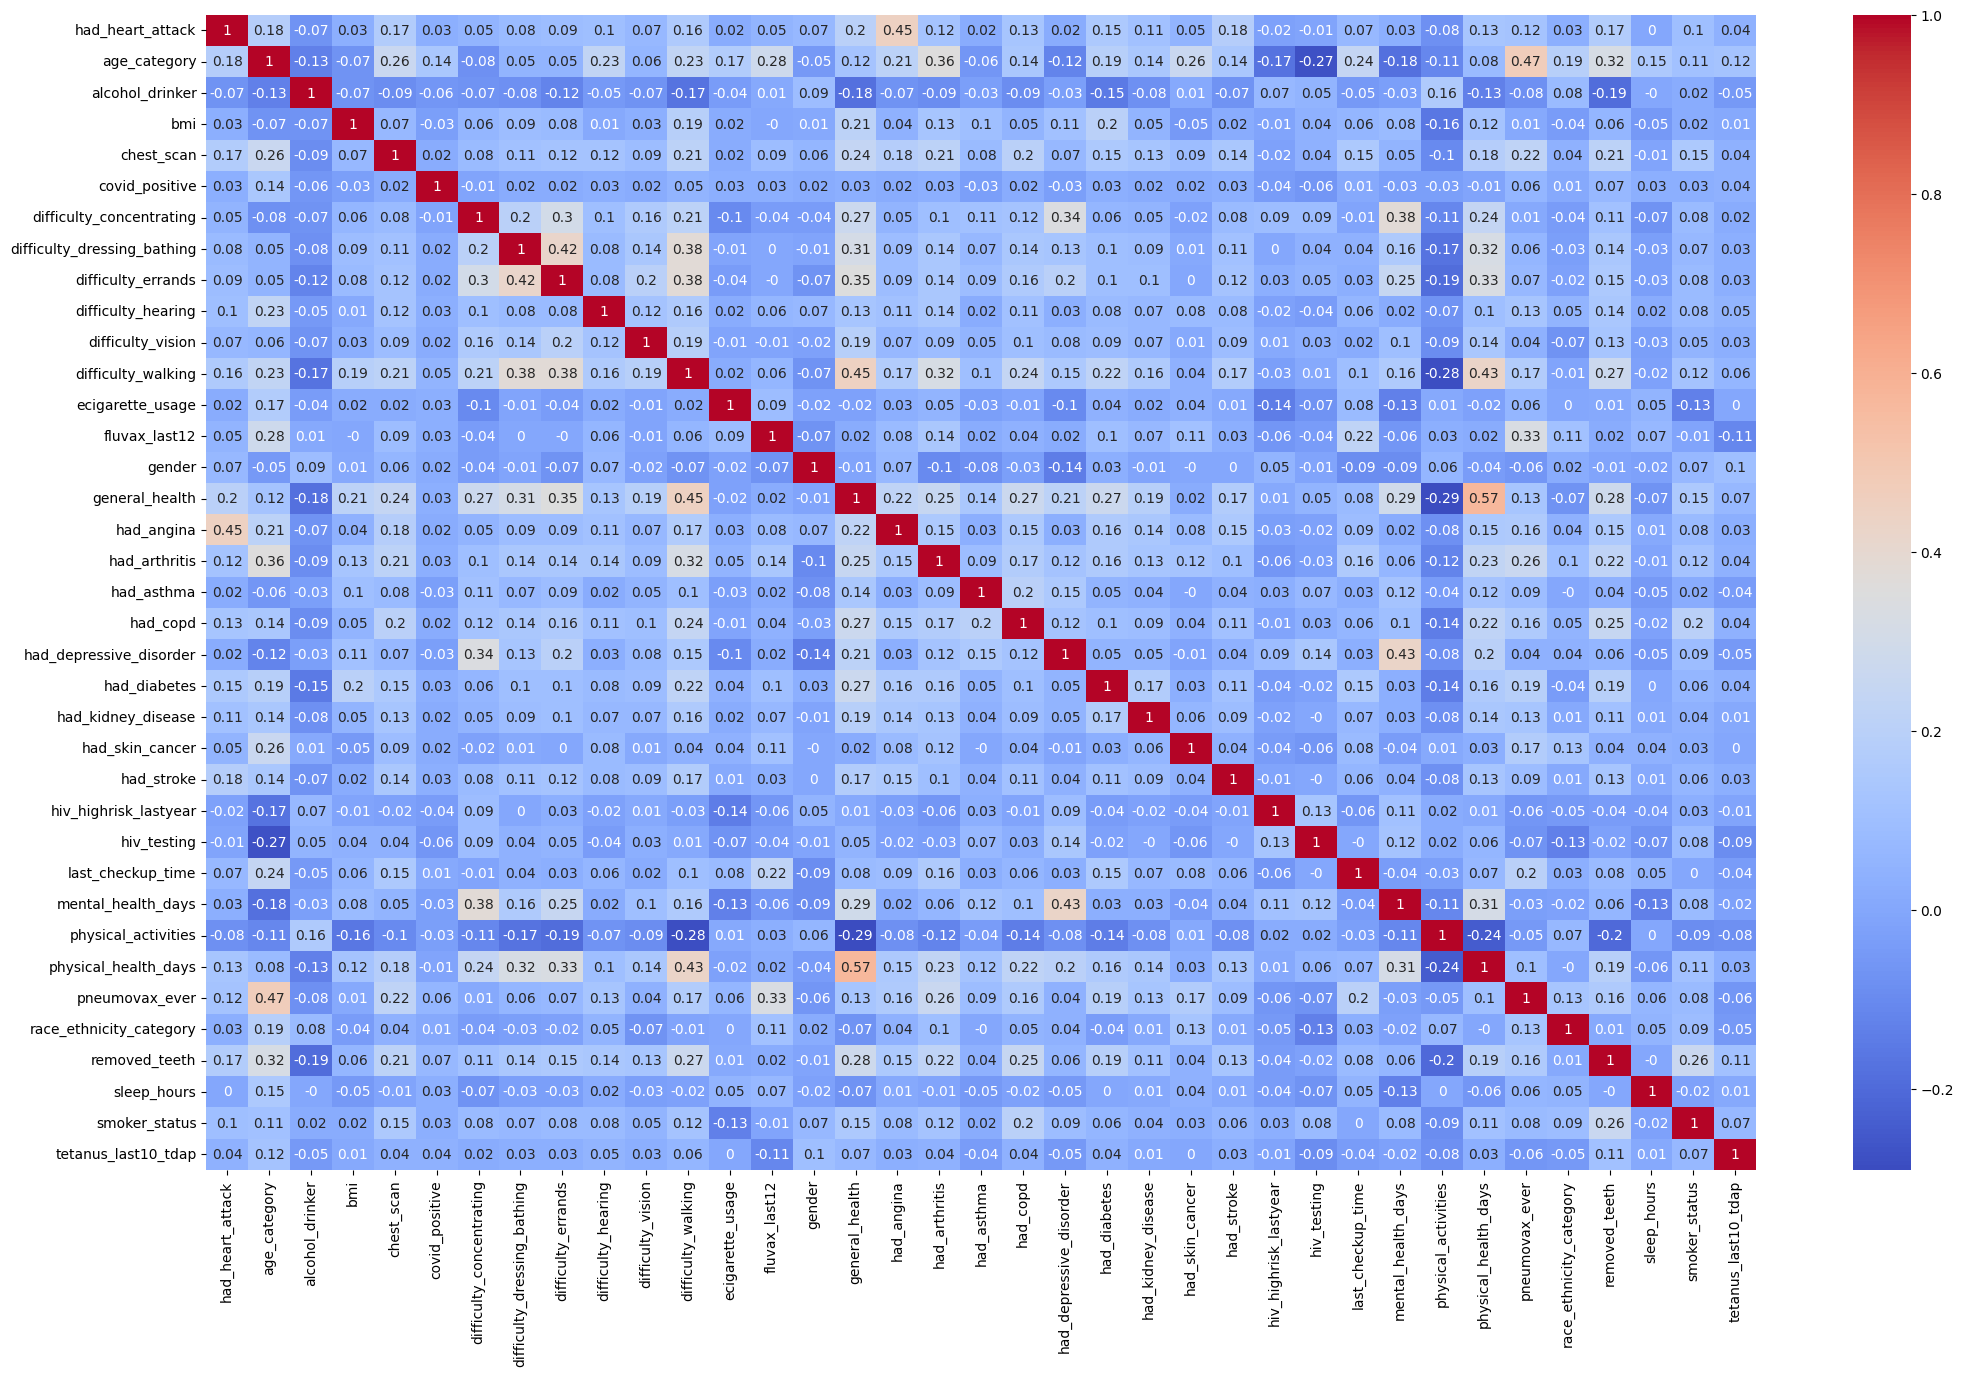

In [59]:
df_corr = df_label_encode.copy()

corr = df_corr.corr().round(2)
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

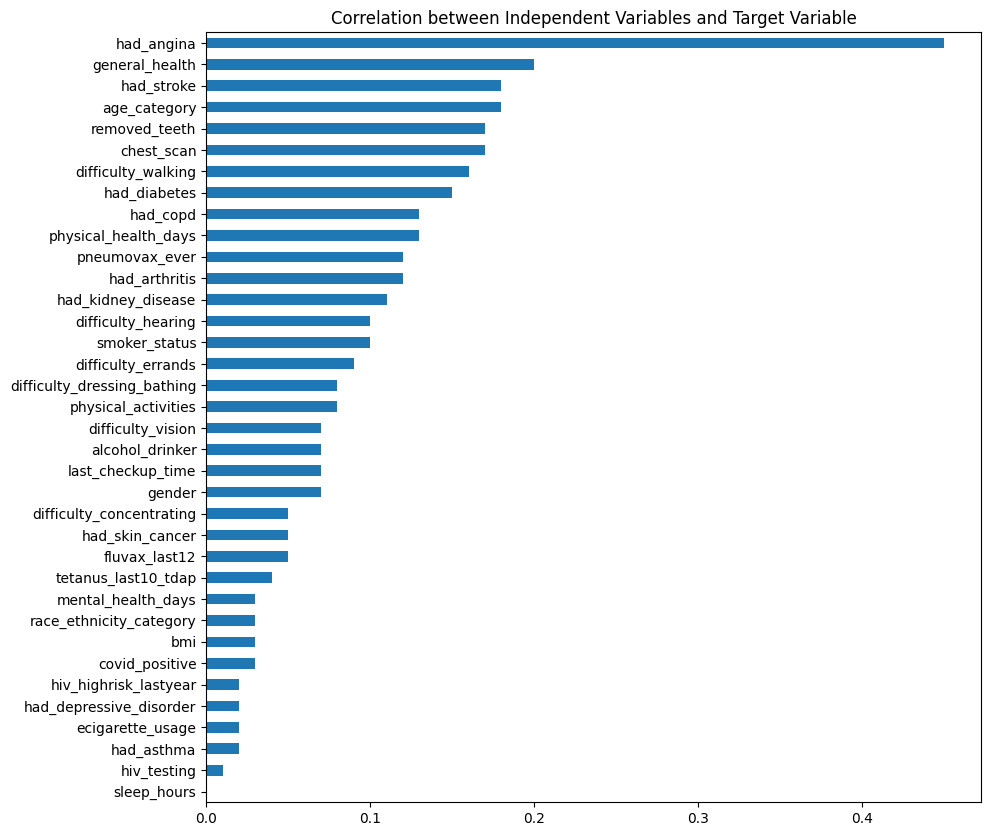

In [63]:
plt.figure(figsize=(10, 10))
plt.title('Correlation between Independent Variables and Target Variable')
abs(corr['had_heart_attack']).sort_values()[:-1].plot.barh()
plt.show()

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_corr.copy()
X = df_vif.drop('had_heart_attack', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,age_category,5.916718
1,alcohol_drinker,2.466306
2,bmi,22.178221
3,chest_scan,2.095716
4,covid_positive,58.184655
5,difficulty_concentrating,1.488491
6,difficulty_dressing_bathing,1.383527
7,difficulty_errands,1.536083
8,difficulty_hearing,1.206106
9,difficulty_vision,1.149925


# Statistical Analysis

## Chi-Square Test

In [74]:
from scipy.stats import chi2_contingency

df_stats = df_corr.copy()

print('p-values\n--------------------------------------------------')
for col in df_stats.columns:
    contingency_table = pd.crosstab(df_stats[col], df_stats['had_heart_attack'])
    chi2, p, dof, eexpected = chi2_contingency(contingency_table)
    print(f'{col}: {p}')

p-values
--------------------------------------------------
had_heart_attack: 0.0
age_category: 0.0
alcohol_drinker: 3.175611575035547e-296
bmi: 7.609675846012608e-86
chest_scan: 0.0
covid_positive: 4.908128438077973e-39
difficulty_concentrating: 1.151407973094875e-144
difficulty_dressing_bathing: 0.0
difficulty_errands: 0.0
difficulty_hearing: 0.0
difficulty_vision: 1.799477104556634e-286
difficulty_walking: 0.0
ecigarette_usage: 6.129134798911479e-17
fluvax_last12: 2.0927963350941613e-111
gender: 2.086026071340358e-289
general_health: 0.0
had_angina: 0.0
had_arthritis: 0.0
had_asthma: 5.526035547516797e-32
had_copd: 0.0
had_depressive_disorder: 7.295212028761504e-32
had_diabetes: 0.0
had_kidney_disease: 0.0
had_skin_cancer: 1.850453342490879e-132
had_stroke: 0.0
hiv_highrisk_lastyear: 1.3561533136924094e-25
hiv_testing: 5.442223201362464e-13
last_checkup_time: 7.138471903296832e-252
mental_health_days: 4.540413350732394e-118
physical_activities: 0.0
physical_health_days: 0.0
pneumova

## QQ Plots

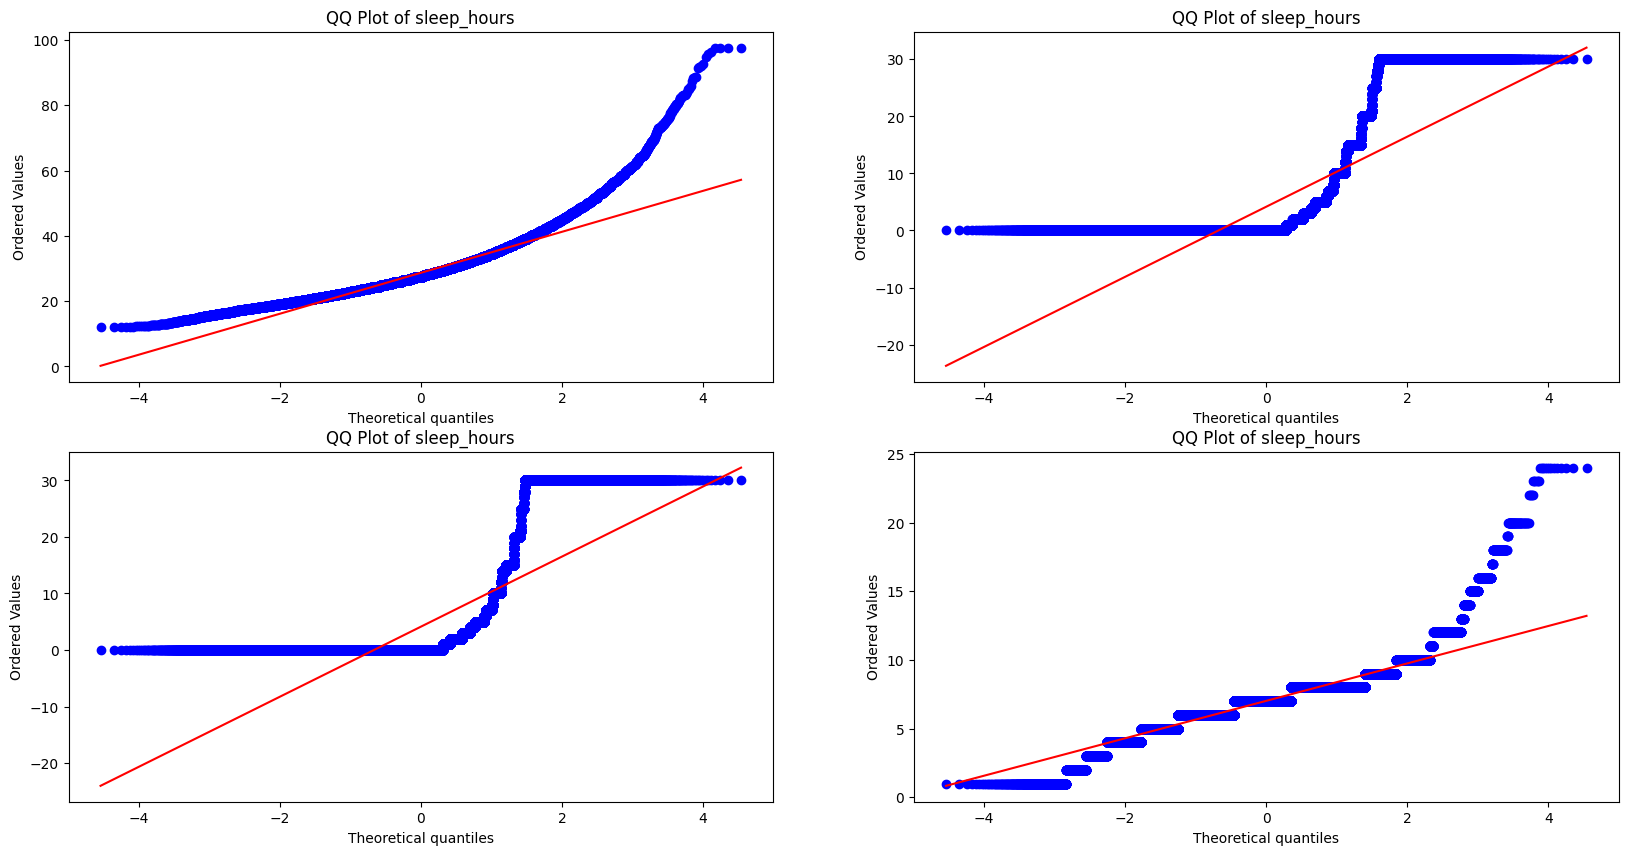

In [78]:
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(numerical_features)):
    stats.probplot(df_stats[numerical_features[i]], dist='norm', plot=axes[i])
    axes[i].set_title(f'QQ Plot of {feature}')

plt.show()

## Shapiro-Wilk Test

In [75]:
from scipy.stats import shapiro

for feature in numerical_features:
    stat, p_value = shapiro(df_stats[feature])
    print(f'{feature}   {stat}  {p_value}')

bmi   0.9281966364565498  2.3605722318935653e-121
mental_health_days   0.5746432537382424  4.6641323341886647e-178
physical_health_days   0.5441229818976095  1.7293835945781407e-180
sleep_hours   0.8948292170365297  1.3581889370521653e-132


c:\Users\wztho\Desktop\College Folder\Degree\Semester 4 (AUG2024)\6006CEM Machine Learning and Related Applications\Assignment\6006cem-ml\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 246022.
  res = hypotest_fun_out(*samples, **kwds)


Findings: None of the numerical features are Gaussian/normal distributions. So, we either use MinMaxScaler or RobustScaler to normalize the values.

# Feature Scaling
Let's verify scaling results.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

df_scale = df_stats.copy()

X = df_scale.drop('had_heart_attack', axis=1)   # Features
y = df_scale['had_heart_attack']            # Target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler_X = MinMaxScaler().set_output(transform='pandas')
X_train[numerical_features] = scaler_X.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler_X.transform(X_test[numerical_features])

In [85]:
X_train[numerical_features]

,bmi,mental_health_days,physical_health_days,sleep_hours
198511,0.188135,0.000000,0.000000,0.217391
436743,0.160808,0.000000,0.000000,0.260870
182801,0.128576,0.000000,0.100000,0.347826
239043,0.133948,0.200000,0.133333,0.217391
131222,0.208105,0.066667,0.000000,0.260870
...,...,...,...,...
218575,0.085834,0.000000,0.000000,0.304348
189173,0.190354,0.000000,0.333333,0.304348
237810,0.225388,0.000000,0.000000,0.260870
265492,0.180077,0.000000,0.000000,0.304348


In [84]:
X_test[numerical_features]

,bmi,mental_health_days,physical_health_days,sleep_hours
354325,0.330842,0.000000,0.000000,0.304348
421004,0.268014,0.166667,0.066667,0.304348
97676,0.268014,0.333333,0.233333,0.217391
120435,0.387364,0.333333,0.666667,0.304348
334817,0.087236,0.000000,0.000000,0.260870
...,...,...,...,...
105560,0.290552,0.000000,0.100000,0.217391
89306,0.172369,0.166667,1.000000,0.217391
338063,0.074507,0.500000,0.500000,0.217391
22575,0.186383,0.000000,0.000000,0.304348


# Export Dataset

In [87]:
df_export = df_stats.copy()
df_export.to_csv('../data/processed/brfss_heart_2022.csv', index=False)

In [89]:
for col in df_export.columns:
    print(col)

had_heart_attack
age_category
alcohol_drinker
bmi
chest_scan
covid_positive
difficulty_concentrating
difficulty_dressing_bathing
difficulty_errands
difficulty_hearing
difficulty_vision
difficulty_walking
ecigarette_usage
fluvax_last12
gender
general_health
had_angina
had_arthritis
had_asthma
had_copd
had_depressive_disorder
had_diabetes
had_kidney_disease
had_skin_cancer
had_stroke
hiv_highrisk_lastyear
hiv_testing
last_checkup_time
mental_health_days
physical_activities
physical_health_days
pneumovax_ever
race_ethnicity_category
removed_teeth
sleep_hours
smoker_status
tetanus_last10_tdap
